In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [24]:
print(X.head(10))
X.info()
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

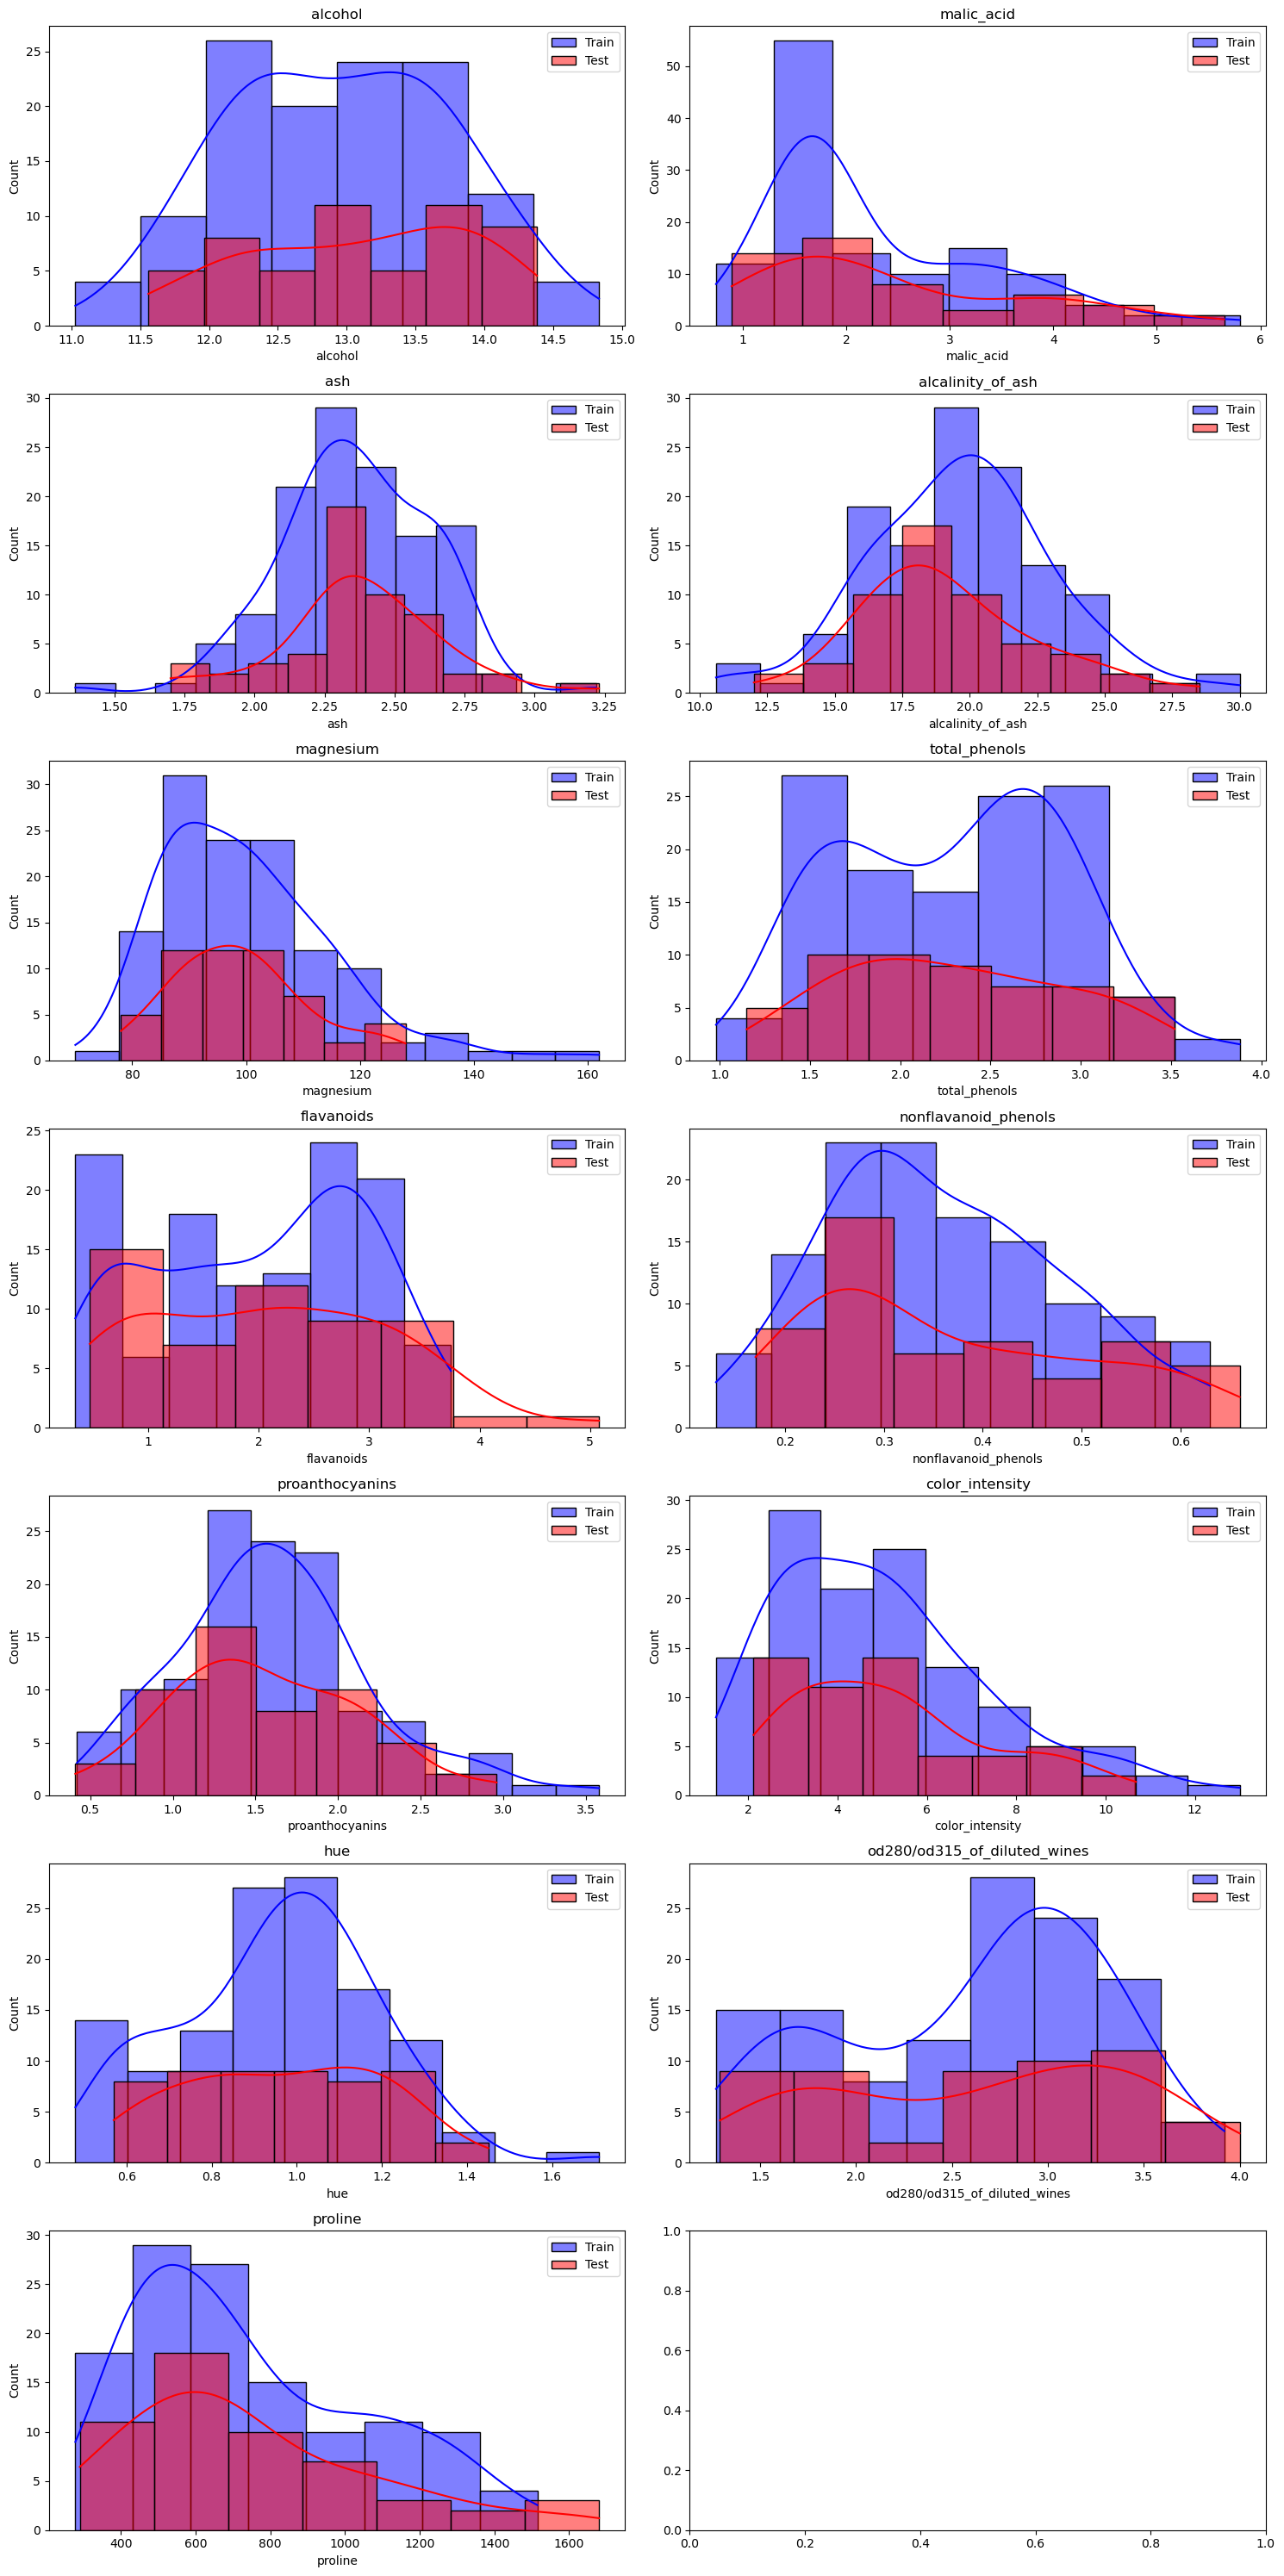

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X_train[col], ax=axes[i], kde=True, color='blue', label='Train')
    sns.histplot(X_test[col], ax=axes[i], kde=True, color='red', label='Test')
    axes[i].set_title(col)
    axes[i].legend()
plt.tight_layout()
plt.show()


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

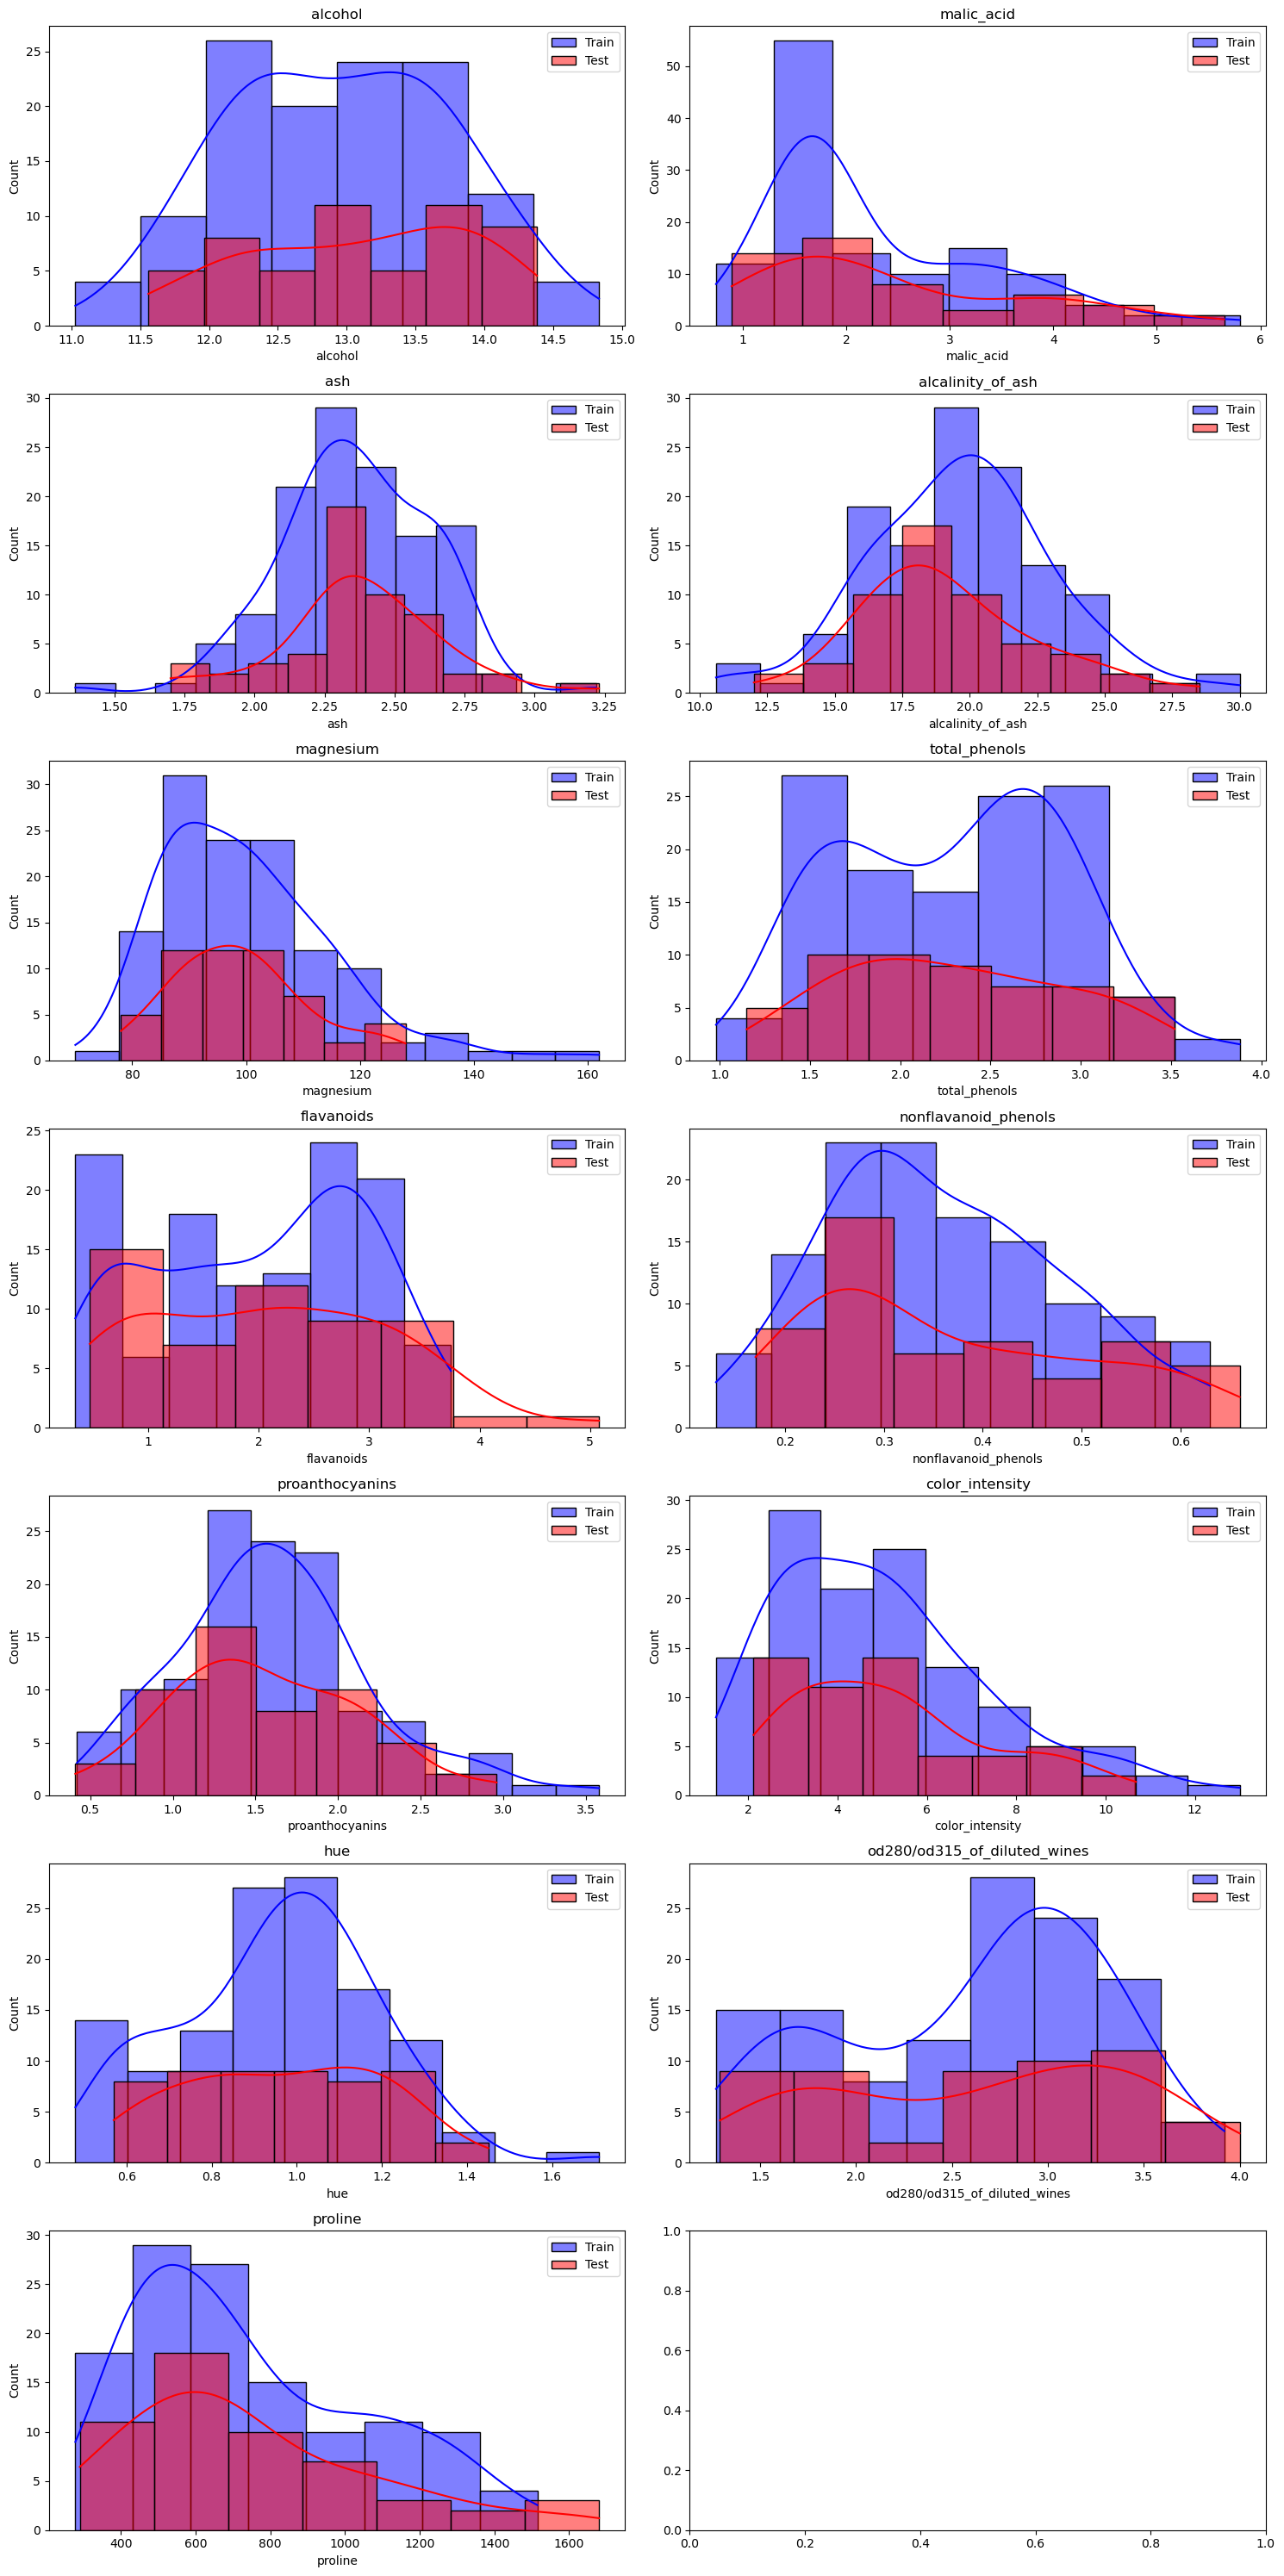

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X_train[col], ax=axes[i], kde=True, color='blue', label='Train')
    sns.histplot(X_test[col], ax=axes[i], kde=True, color='red', label='Test')
    axes[i].set_title(col)
    axes[i].legend()
plt.tight_layout()
plt.show()


In [13]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier()}

In [14]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Estimator: {grid_search.best_estimator_}")


Best Score: 0.8863333333333333
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=10)


              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.90      0.90        21
           2       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



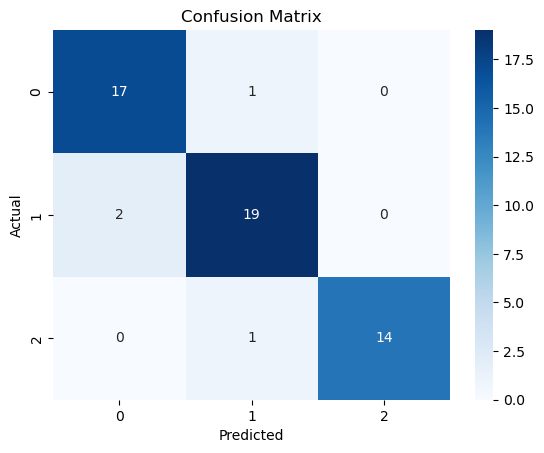

In [19]:
y_pred = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()